                                     **Introduction**
Our data consists of 50000 comments. There are 25000 negative and 25000 positive comments. Comments are of different lengths and are given in sentences.

Using the imdb dataset, we will train our LSTM model with positive and negative comments about movies. First, we will make comments available for the LSTM model. After training our model, we will examine the accuracy and loss values on the chart :







In [ ]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization


In [ ]:
#loading the data
df = pd.read_csv('IMDB N Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# print the size of the dataframe
print(df.shape)

(10000, 2)


In [ ]:
# Sampling 10,000 random rows from the DataFrame
df=df.sample(10000)

In [ ]:
# print summary info on each column of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 32814 to 17025
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 234.4+ KB
None


In [ ]:
# show the number of missing rows in each column
print(df.isna().sum().sort_values(ascending=False))

review       0
sentiment    0
dtype: int64


There are no missing values in the dataset


In [ ]:
# print unique values in the sentiment column
print(df.sentiment.unique())

[1 0]


In [ ]:
# print the proportion of positive and negative sentiments in the data set
df.sentiment.value_counts(ascending=False, normalize=True)

1    0.5033
0    0.4967
Name: sentiment, dtype: float64

The data set is balanced, it contains equal porportions of positive and negative sentiment reviews


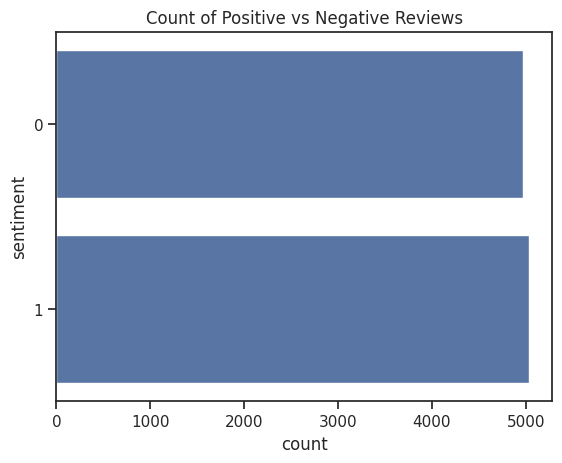

In [ ]:
sns.set_theme(style='ticks', palette="deep")

sns.countplot(data=df, y='sentiment')\
   .set(title='Count of Positive vs Negative Reviews')

plt.show()

 Data Cleaning & Preprocessing


First, the reviews texts are cleaned using a combination of python packages, like emoji, re etc. The reviews are then transformed by lemmatization and vectorization using a Bag of Words (BoW) model.

In [ ]:
random_state = np.random.RandomState(42)
def print_random_review() -> None:
    # select and print a random review in full
    random_review = df.review.sample(n=1, random_state=random_state).values
    print(random_review[0])

print_random_review()

thought movie lol funny fun taken seriously movie one man twisted view life love well lady lowly bus station skank highclass débutante bus station skank tim meadow play guy leon phelps raised playboystyle mansion hugh hefneresquire father figure surrounded constantly beautiful porn model actress father kick street must learn fend nothing chauvinistic outlook life youth taught unfathomable nearly mystical level charm dumb luck hijinx begin seen movie enjoy lighthearted semimindless comedylove story highly recommend renting lady man


Remove HTML tags
Function to replace html tags like <br /> with empty space etc.

In [ ]:
#function to replace html tags like <br /> with empty space etc.

import re

def remove_html_tags(text: str) -> str:
    # find and replace html tag patterns in text
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

# apply the function to reviews
df['review'] = df.review.apply(remove_html_tags)

print_random_review()

terrible movie im even sure terrible ugly one trendy visual style maybe seemed like good idea time enables one instantly recognize film time period product film retains story song made stage version musical hit song sound lifeless screen mostly movie suck wan performance lucille ball think would able make something largerthanlife character anyone could sleepwalks movie like terrified actress choking opening night film sink even bea arthur bet hilarious best friend role onstage cant breathe life stinkeravoid costsgrade


In [ ]:
# Remove URLs
#Function to replace urls in reviews, with empty space.
def remove_urls(text: str) -> str:
    # find and replace url patterns in text
    pattern= re.compile(r'https?://\S+|www\.\S+', flags=re.IGNORECASE)
    return pattern.sub(r'', text)

# apply the function to reviews
df['review'] = df.review.apply(remove_urls)

print_random_review()

loved film intelligent also great action sequence without basing movie solely around quinn sutherland kingsley put fantastic performance enough twist keep anyone interested ending great well


In [ ]:
# Convert all texts to lowercase¶
df['review'] = df.review.str.lower()

print_random_review()


chupacabra terror saved presence canadian cutie chelan simmons heroine delight watch front back side otherwise standard monster movie playing like lowbudget shipboard version relic john rhysdavies play captain ship monster transported nonscary monster simply man suit commit senseless gory killing least body count one pretty awesome formulaic say least love moment simmons ominously tell someone chupacabra stand goat eater oooohhhscary


Remove stop words
Stop words like "should", "shouldn't", "would", "being", "theirs", "and", etc do not contribute much to the context of a sentence, hence can be excluded from the review texts.

Using the nltk library, we can remove all English stop words from the revies texts

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words_set = set(stopwords.words('english'))

print(stop_words_set)

def remove_stop_words(text: str) -> str:
    # splits text into list or words, and iterates through to
    # return only words that are not in stop_words_set
    words = [word for word in text.split() if word not in stop_words_set]
    return " ".join(words)

df['review'] = df.review.apply(remove_stop_words)

print_random_review()

{'if', 'theirs', 'myself', "didn't", "isn't", 'above', 'shan', 'isn', "wasn't", 'why', 'off', 'once', 'same', 'will', "haven't", 'an', 'are', "hadn't", 'against', 'don', 'your', 'just', 'from', 'with', 'then', 'few', 'ma', 'mightn', 'being', 'down', 'his', 'our', 'any', 'd', 'than', 'each', 'yourselves', 'there', "it's", 'herself', 'yours', "don't", 'during', 'all', 'didn', 'and', 'she', 'about', 'own', 'haven', 'while', 'these', 'm', "mustn't", 'we', 'ours', 'them', 'having', 'himself', 'were', 'was', 'aren', 'how', 'no', 'hadn', 'so', 'too', 'when', "you'll", 'couldn', 'further', "shan't", 'it', 'its', 'other', 'shouldn', 'been', 'over', 'whom', "shouldn't", 'he', 'as', 'be', 'which', 're', "you're", 'such', 'is', "won't", 'after', "needn't", 'this', 'some', 'a', 'wasn', 'those', 'both', 'yourself', 'has', 'wouldn', "weren't", "that'll", 'they', 'my', 'themselves', 'between', 'here', 'doesn', 'through', 've', 'more', 'had', 'do', 'you', 'under', "couldn't", 'on', 'for', 'at', "should

In [ ]:
#Remove punctuations
import string

def remove_punctuations(text: str) -> str:
    return text.translate(str.maketrans('', '', string.punctuation))

# apply the function to reviews
df['review'] = df.review.apply(remove_punctuations)

print_random_review()

even film clear see ali g become exact character set parody fan sacha baron cohens character anyway curious see man little talent able convince universal studio fund near half hour feature film minute joke paperthin plot torrent penis marijuana joke must admit cringe saw respected thespian charles dance michael gambon stoop low employment saying must admit even quite ashamed raise titter one occasion however bad film never boring never consider switching mainly due gorgeous rhona mitra saying watch film teenage lad aged find dick joke hilarious


In [ ]:
#Remove digits
#Remove digits from the remaining review texts
df['review'] = df.review.str.replace(r'\d+', r'', regex=True)

print_random_review()

thought excellent honest portrayal paralysis racism movie never pander audience never get predictable acting topnotch movie reminded one flew cuckoo nest


In [ ]:
#Lemmatize Reviews¶
from textblob import Word

nltk.download('wordnet')

def lemmatize_words(text: str) -> str:
    words = [Word(word).lemmatize() for word in text.split()]
    return " ".join(words)

# apply function to review
df['review'] = df.review.apply(lemmatize_words)

print_random_review()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


seen many many film china hong kong worst worst one unknown pleasure watched platform yesterday evening thought jia zhang kes two film must better evening disappointed watching xiao wu tomorrow evening placed three film bin whoever gave film platform ten ten need watch cinema photography poor difficult differentiate character lack closeup work storyline disjointed fastforwarded towards end pure frustration would recommend film anyone give zhang yimou chen kage day true master chinese cinema pretentious con men


In [ ]:
#Binarize Sentiments
sentiment_map = {'positive':1, 'negative':0}

df['sentiment'] = df.sentiment.replace(sentiment_map).astype(int)

df.head()

,review,sentiment
32814,filmed mgm set english version german garbo se...,1
21493,one sincere touching boymeetsgirl movie ever m...,1
27686,want really terrify people choose devil subjec...,1
38843,well time really given hope going standout epi...,1
48266,abysmal overthetop acting might enjoy rubbish ...,0


  Model Development

Predicting whether the sentiment in a review is positive or negative is a Natural Language Processing challenge

For this challenge, I will explore using Multinomial,Bernaulli,Gaussian model Naive Bayes Classifier for accuracy comparision

First, we split the dataset into 80% training, and 20% test sets, stratifying along the target variable


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df.review.values,
    df.sentiment.values,
    test_size=0.2,
    random_state=random_state,
    stratify=df.sentiment.values
)

In [ ]:
#Then we vectorize the training and test sets to transform the reviews into vectors using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training set and transform them into feature vectors
X_train = vectorizer.fit_transform(x_train)

# Transform the test set into feature vectors
X_test = vectorizer.transform(x_test)

In [ ]:
X_train.shape

(8000, 64565)

In [ ]:
X_test.shape

(2000, 64565)

In [ ]:
y_train.shape

(8000,)

In [ ]:
y_test.shape

(2000,)

In [ ]:
#Base Classifier Model (Naive Bayes)
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB




In [ ]:
# Initializing Gaussian Naive Bayes classifier
clf1 = GaussianNB()

# Initializing Multinomial Naive Bayes classifier
clf2 = MultinomialNB()

# Initializing Bernoulli Naive Bayes classifier
clf3 = BernoulliNB()



In [ ]:
# Convert sparse matrix X_train to dense numpy array
X_train_dense = X_train.toarray()

# Fit the Gaussian Naive Bayes classifier
clf1.fit(X_train_dense, y_train)

# Fit the Multinomial Naive Bayes classifier
clf2.fit(X_train_dense, y_train)

# Fit the Bernoulli Naive Bayes classifier
clf3.fit(X_train_dense, y_train)


BernoulliNB()

In [ ]:
# Convert sparse matrix X_test to dense numpy array
X_test_dense = X_test.toarray()

# Use the Gaussian Naive Bayes classifier to make predictions
y_pred1 = clf1.predict(X_test_dense)

# Use the Multinomial Naive Bayes classifier to make predictions
y_pred2 = clf2.predict(X_test_dense)

# Use the Bernoulli Naive Bayes classifier to make predictions
y_pred3 = clf3.predict(X_test_dense)


In [ ]:
# Check the shape of the X_test array
X_test.shape

(2000, 64565)

In [ ]:
# Check the shape of the y_pred1 test array
y_pred1.shape

(2000,)

In [ ]:
# Import the accuracy_score function from sklearn.metrics
from sklearn.metrics import accuracy_score


In [ ]:
# Printing the accuracy scores for each model
print("Gaussian",accuracy_score(y_test,y_pred1))
print("Multinomial",accuracy_score(y_test,y_pred2))
print("Bernaulli",accuracy_score(y_test,y_pred3))

Gaussian 0.649
Multinomial 0.841
Bernaulli 0.829


Recommendation and Conclusion

The  Multinomial and Bernaulli model have a higher accuracy score (84.1%,82.9%) than the Gaussian Naive Bayes model accuracy score (64.6%).
Multinomial and Bernaulli models are comparable, can be fine tuned with hyper parameter tuning to achieve even higher accuracy with more training.


In [ ]:
#Thank you